**Original Code and Article:**
- [Complete Python Code on Github](https://github.com/pmraulgarcia/Analyzing-the-2025-Brazilian-Grand-Prix-with-Python-and-FastF1?source=post_page-----c0fee26b1eb4---------------------------------------) 👩‍💻
- [Article on Medium](https://medium.com/python-in-plain-english/analyzing-the-2025-brazilian-grand-prix-with-python-and-fastf1-c0fee26b1eb4) 📝

In [51]:
# Import required libraries
import fastf1
import fastf1.plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import LineCollection
from matplotlib import cm
import seaborn as sns
import warnings
import logging
from fastf1 import plotting

# Configure settings
warnings.filterwarnings('ignore')
#fastf1.Cache.enable_cache('f1_cache')  # Enable caching for faster subsequent loads
fastf1.plotting.setup_mpl(misc_mpl_mods=False)  # Setup FastF1 plotting style
# Suppress all fastf1 log messages by setting level to CRITICAL
logging.getLogger('fastf1').setLevel(logging.CRITICAL)

# Set plotting style
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

print("✅ All libraries imported successfully!")
print(f"📦 FastF1 version: {fastf1.__version__}")

✅ All libraries imported successfully!
📦 FastF1 version: 3.6.1


In [52]:
# Load race session
print("🔄 Loading 2025 Brazilian GP Race data...")
race = fastf1.get_session(2025, 'Brazil', 'R')
race.load()

print("✅ Race data loaded successfully!")
print(f"🏁 Race: {race.event['EventName']}")
print(f"📅 Date: {race.event['EventDate']}")
print(f"📍 Location: {race.event['Location']}, {race.event['Country']}")

🔄 Loading 2025 Brazilian GP Race data...
✅ Race data loaded successfully!
🏁 Race: São Paulo Grand Prix
📅 Date: 2025-11-09 00:00:00
📍 Location: São Paulo, Brazil


In [53]:
# Get race results
results = race.results

# Create a clean results DataFrame
results_df = pd.DataFrame({
    'Position': results['Position'].astype(int),
    'Driver': results['Abbreviation'],
    'FullName': results['FullName'],
    'DriverNumber': results['DriverNumber'],
    'Team': results['TeamName'],
    'Points': results['Points'],
    'Status': results['Status'],
    'GridPosition': results['GridPosition']
})

results_df['Positions_Gained'] = results_df['GridPosition'] - results_df['Position']

print("🏁 2025 BRAZILIAN GRAND PRIX - FINAL RESULTS\n")
print(results_df.to_string(index=False))
print("\n" + "="*80)

🏁 2025 BRAZILIAN GRAND PRIX - FINAL RESULTS

 Position Driver          FullName DriverNumber            Team  Points   Status  GridPosition  Positions_Gained
        1    NOR      Lando Norris            4         McLaren    25.0 Finished           1.0               0.0
        2    ANT    Kimi Antonelli           12        Mercedes    18.0 Finished           2.0               0.0
        3    VER    Max Verstappen            1 Red Bull Racing    15.0 Finished          19.0              16.0
        4    RUS    George Russell           63        Mercedes    12.0 Finished           6.0               2.0
        5    PIA     Oscar Piastri           81         McLaren    10.0 Finished           4.0              -1.0
        6    BEA    Oliver Bearman           87    Haas F1 Team     8.0 Finished           8.0               2.0
        7    LAW       Liam Lawson           30    Racing Bulls     6.0 Finished           7.0               0.0
        8    HAD      Isack Hadjar            6    

📊 Analyzing position changes throughout the race...



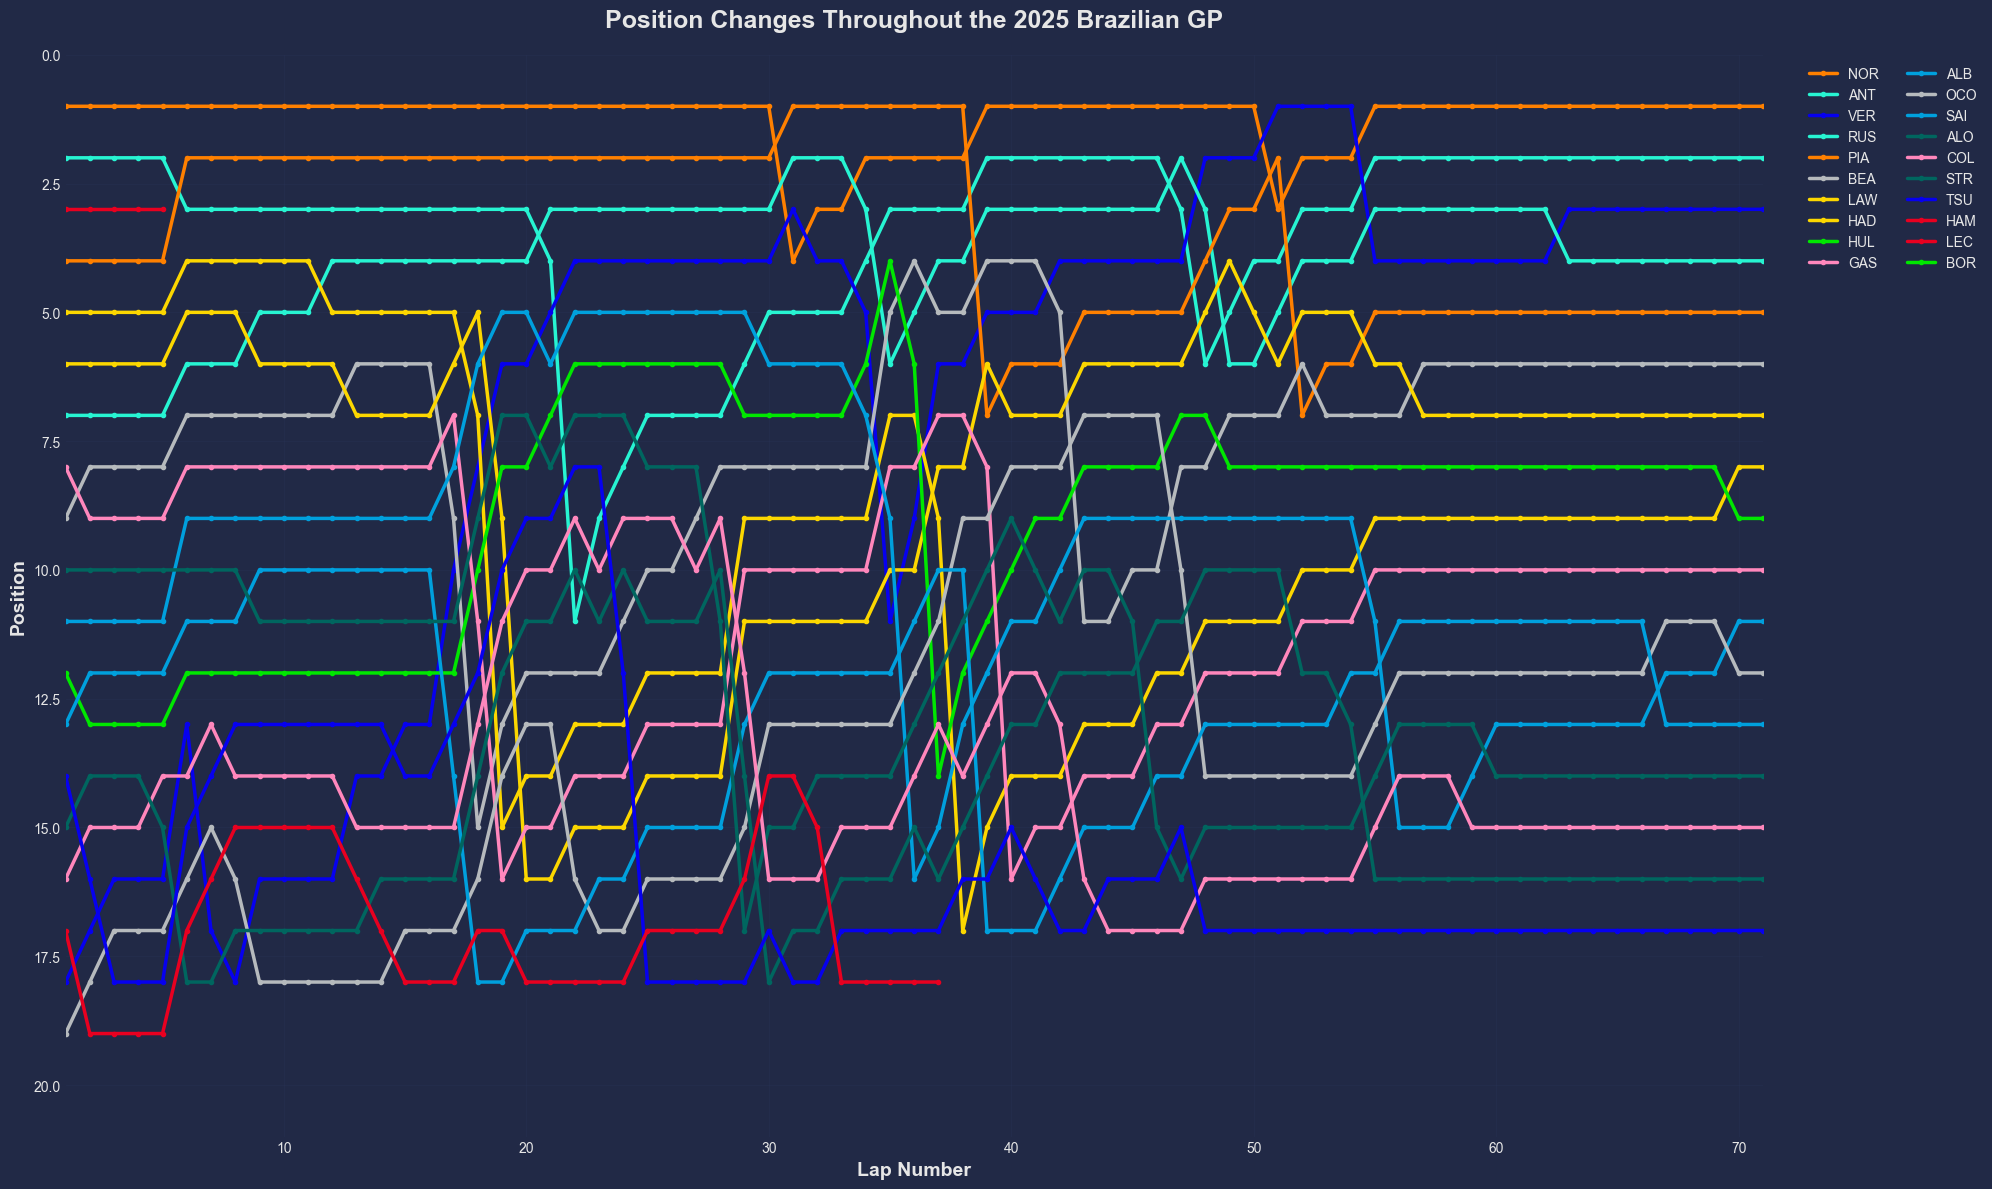

✅ Position changes visualization complete!


In [70]:
# Get position data for all drivers
print("📊 Analyzing position changes throughout the race...\n")

# Create a DataFrame to track positions lap by lap
drivers = race.drivers
position_data = []

for driver_id in drivers:
    driver_laps = race.laps.pick_driver(driver_id)
    for idx, lap in driver_laps.iterrows():
        position_data.append({
            'LapNumber': lap['LapNumber'],
            'Driver': driver_id,
            'Position': lap['Position'],
            'Team': lap['Team']
        })

position_df = pd.DataFrame(position_data)

# Plot position changes
fig, ax = plt.subplots(figsize=(20, 12))

for driver_id in drivers:
    driver_data = position_df[position_df['Driver'] == driver_id]
    if len(driver_data) > 0:
        # Get driver abbreviation for consistent color lookup
        driver_abbr = race.get_driver(driver_id).Abbreviation
        color = fastf1.plotting.get_driver_color(driver_abbr, session=race)
        ax.plot(driver_data['LapNumber'], driver_data['Position'],
                color=color, linewidth=2.5, label=driver_abbr, marker='o', markersize=3)

ax.set_ylim(21, 0)  # Invert y-axis so position 1 is at top
ax.set_xlim(1, race.laps['LapNumber'].max())
ax.set_xlabel('Lap Number', fontsize=14, fontweight='bold')
ax.set_ylabel('Position', fontsize=14, fontweight='bold')
ax.set_title('Position Changes Throughout the 2025 Brazilian GP',
             fontsize=18, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10, ncol=2)

plt.tight_layout()
plt.savefig('brazil_2025_position_changes.png', dpi=300, bbox_inches='tight', facecolor='#0e1117')
plt.show()

print("✅ Position changes visualization complete!")

In [55]:
# Fastest laps analysis
print("⚡ FASTEST LAPS ANALYSIS\n")

fastest_laps = []
for driver in race.drivers:
    driver_laps = race.laps.pick_driver(driver)
    fastest_lap = driver_laps.pick_fastest()
    if fastest_lap is not None and not pd.isna(fastest_lap['LapTime']):
        fastest_laps.append({
            'Driver': driver,
            'Team': fastest_lap['Team'],
            'LapTime': fastest_lap['LapTime'].total_seconds(),
            'LapNumber': fastest_lap['LapNumber'],
            'Compound': fastest_lap['Compound']
        })

fastest_df = pd.DataFrame(fastest_laps).sort_values('LapTime')
fastest_df['Gap'] = fastest_df['LapTime'] - fastest_df['LapTime'].min()

print(fastest_df[['Driver', 'Team', 'LapTime', 'Gap', 'LapNumber', 'Compound']].to_string(index=False))
print(f"\n🏁 Fastest lap: {fastest_df.iloc[0]['Driver']} - {fastest_df.iloc[0]['LapTime']:.3f}s")

⚡ FASTEST LAPS ANALYSIS

Driver            Team  LapTime    Gap  LapNumber Compound
    23        Williams   72.400  0.000       59.0   MEDIUM
     1 Red Bull Racing   72.447  0.047       56.0     SOFT
    81         McLaren   72.742  0.342       54.0   MEDIUM
    22 Red Bull Racing   72.774  0.374       49.0   MEDIUM
    43          Alpine   72.816  0.416       45.0   MEDIUM
     4         McLaren   73.040  0.640       66.0   MEDIUM
    18    Aston Martin   73.094  0.694       56.0   MEDIUM
    63        Mercedes   73.097  0.697       52.0   MEDIUM
    12        Mercedes   73.123  0.723       52.0   MEDIUM
    14    Aston Martin   73.312  0.912       48.0   MEDIUM
    27     Kick Sauber   73.474  1.074       39.0     SOFT
    31    Haas F1 Team   73.481  1.081       10.0   MEDIUM
    87    Haas F1 Team   73.483  1.083       48.0   MEDIUM
    55        Williams   73.683  1.283       19.0   MEDIUM
     6    Racing Bulls   73.694  1.294       40.0   MEDIUM
    10          Alpine   73.736

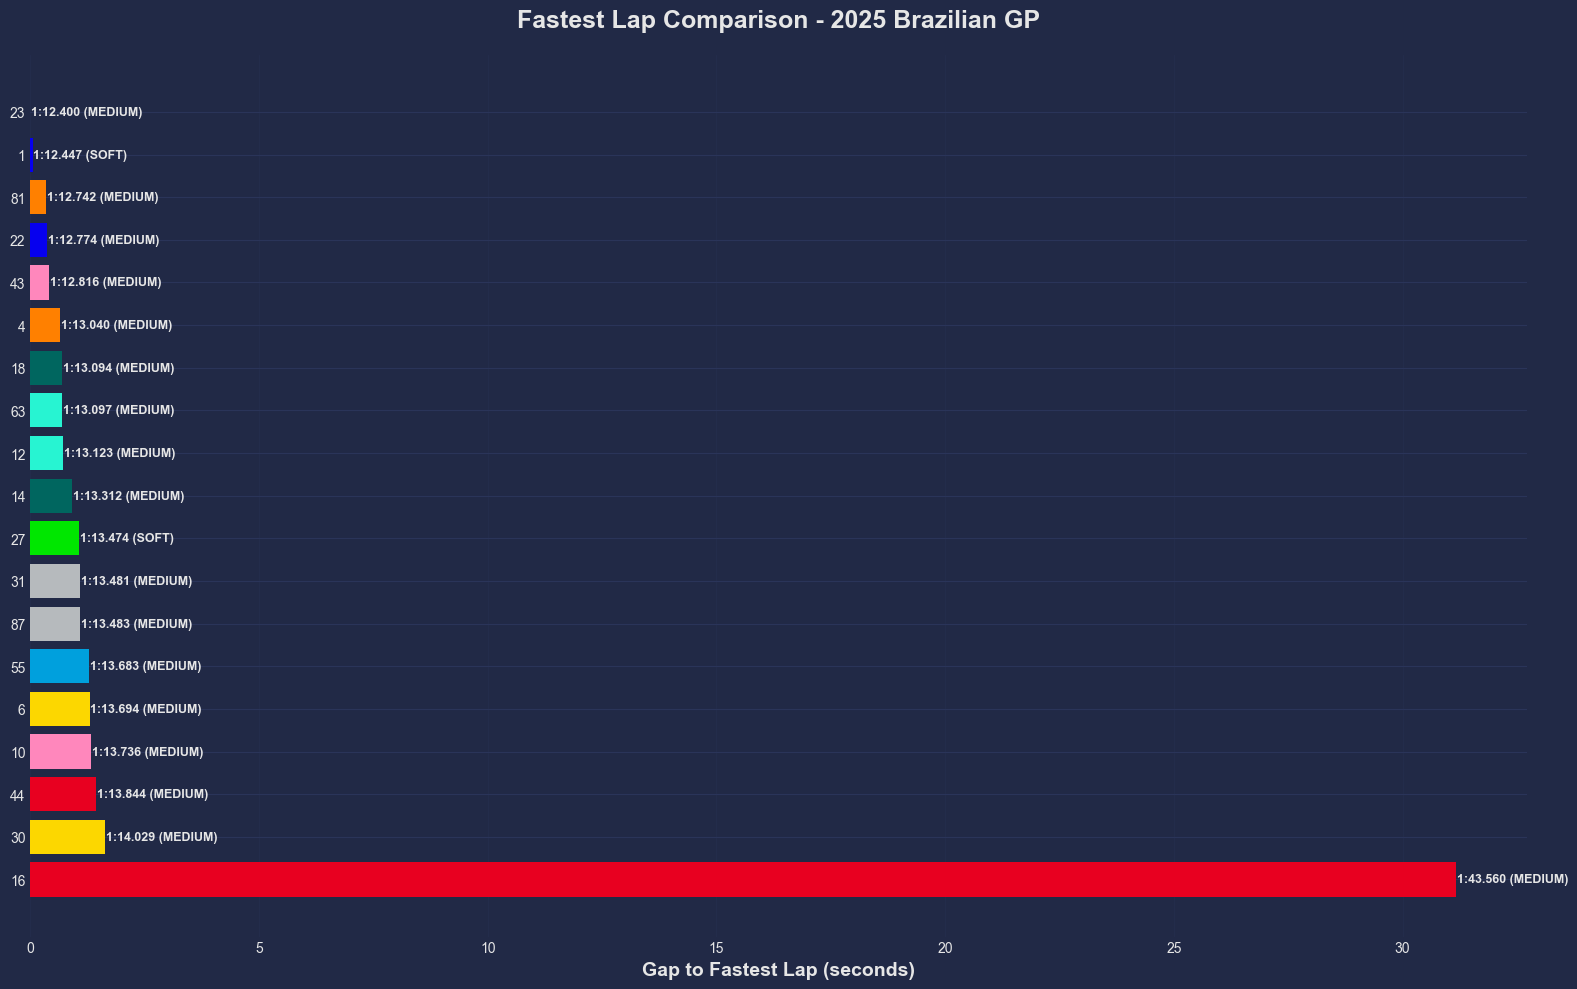

In [56]:
# Visualize fastest laps
fig, ax = plt.subplots(figsize=(16, 10))

# Get driver abbreviations for consistent color lookup
driver_abbreviations = [race.get_driver(driver_id).Abbreviation for driver_id in fastest_df['Driver']]
colors = [fastf1.plotting.get_driver_color(abbr, session=race) for abbr in driver_abbreviations]
bars = ax.barh(fastest_df['Driver'], fastest_df['Gap'], color=colors,
                linewidth=1.5)

ax.set_xlabel('Gap to Fastest Lap (seconds)', fontsize=14, fontweight='bold')
ax.set_title('Fastest Lap Comparison - 2025 Brazilian GP',
             fontsize=18, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x')
ax.invert_yaxis()

# Add lap time labels
for i, (bar, laptime, compound) in enumerate(zip(bars, fastest_df['LapTime'], fastest_df['Compound'])):
    width = bar.get_width()
    minutes = int(laptime // 60)
    seconds = laptime % 60
    ax.text(width + 0.02, bar.get_y() + bar.get_height()/2.,
             f'{minutes}:{seconds:06.3f} ({compound})',
             ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('brazil_2025_fastest_laps.png', dpi=300, bbox_inches='tight', facecolor='#0e1117')
plt.show()


📈 Analyzing lap time evolution for top 5 finishers...



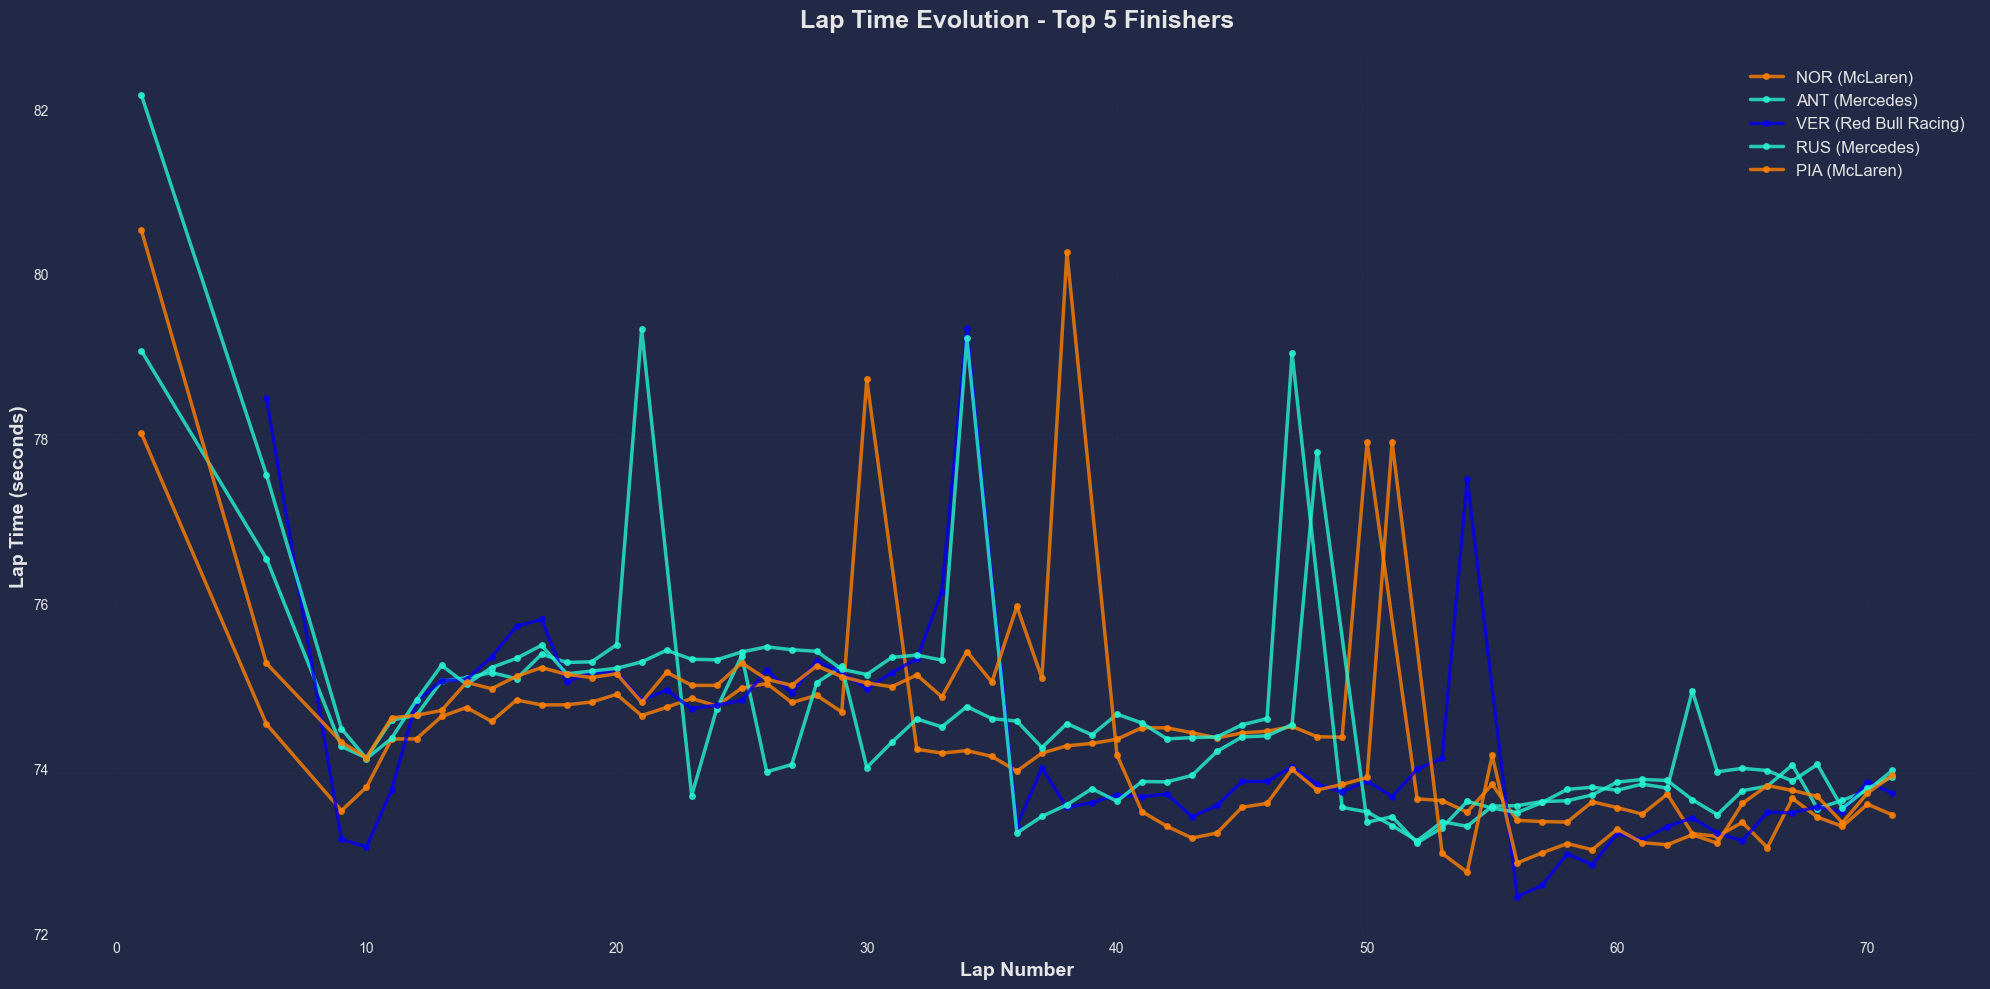

In [57]:
# Lap time evolution for top 5 finishers
print("\n📈 Analyzing lap time evolution for top 5 finishers...\n")

fig, ax = plt.subplots(figsize=(20, 10))

top5_drivers = results_df.head(5)['Driver'].tolist()

for driver in top5_drivers:
    driver_laps = race.laps.pick_driver(driver)
    # Filter out slow laps (pit stops, incidents, etc.)
    median_time = driver_laps['LapTime'].dt.total_seconds().median()
    driver_laps = driver_laps[driver_laps['LapTime'].dt.total_seconds() < median_time * 1.15]

    color = fastf1.plotting.get_driver_color(driver, session=race)

    lap_times = driver_laps['LapTime'].dt.total_seconds()
    lap_numbers = driver_laps['LapNumber']

    team = driver_laps.iloc[0]['Team']
    ax.plot(lap_numbers, lap_times, color=color, linewidth=2.5,
            label=f"{driver} ({team})", marker='o', markersize=4, alpha=0.8)

ax.set_xlabel('Lap Number', fontsize=14, fontweight='bold')
ax.set_ylabel('Lap Time (seconds)', fontsize=14, fontweight='bold')
ax.set_title('Lap Time Evolution - Top 5 Finishers',
             fontsize=18, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=12, loc='best')

plt.tight_layout()
plt.savefig('brazil_2025_lap_evolution.png', dpi=300, bbox_inches='tight', facecolor='#0e1117')
plt.show()

🛞 TIRE STRATEGY ANALYSIS



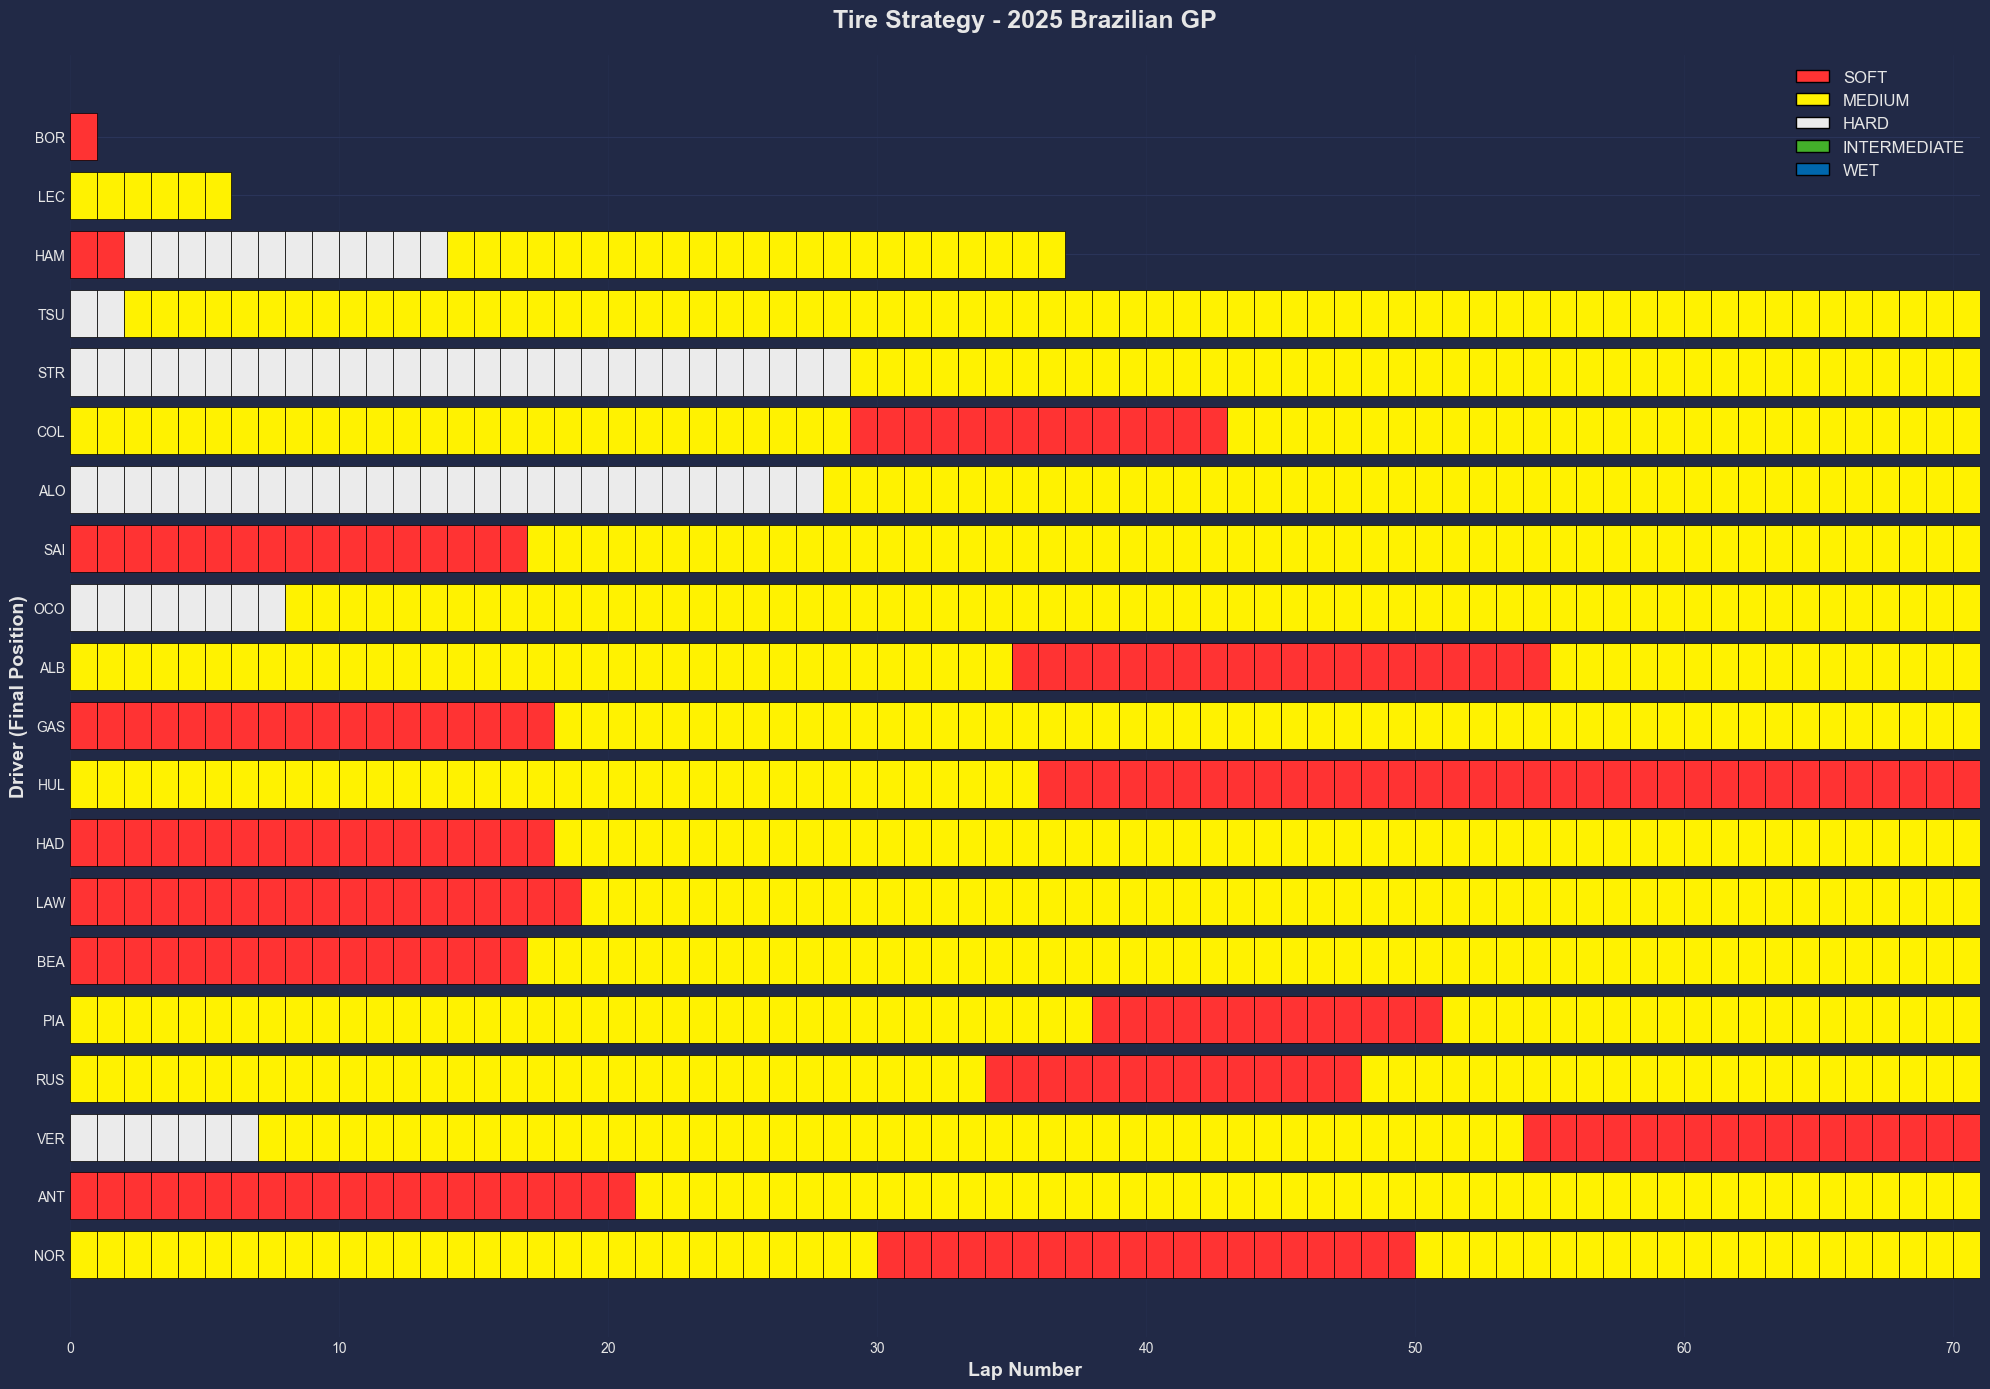

In [58]:
# Tire strategy visualization
print("🛞 TIRE STRATEGY ANALYSIS\n")

# Get all drivers sorted by final position
drivers_sorted = results_df.sort_values('Position')['Driver'].tolist()

fig, ax = plt.subplots(figsize=(20, 14))

# Define compound colors
compound_colors = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFF200',
    'HARD': '#EBEBEB',
    'INTERMEDIATE': '#43B02A',
    'WET': '#0067AD'
}

for idx, driver in enumerate(drivers_sorted):
    driver_laps = race.laps.pick_driver(driver)

    for _, lap in driver_laps.iterrows():
        compound = lap['Compound']
        if pd.notna(compound):
            color = compound_colors.get(compound, '#CCCCCC')
            ax.barh(idx, 1, left=lap['LapNumber']-1,
                   color=color, edgecolor='black', linewidth=0.5)

ax.set_yticks(range(len(drivers_sorted)))
ax.set_yticklabels(drivers_sorted)
ax.set_xlabel('Lap Number', fontsize=14, fontweight='bold')
ax.set_ylabel('Driver (Final Position)', fontsize=14, fontweight='bold')
ax.set_title('Tire Strategy - 2025 Brazilian GP',
             fontsize=18, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x')
ax.set_xlim(0, race.laps['LapNumber'].max())

# Create legend
legend_elements = [mpatches.Patch(facecolor=color, edgecolor='black', label=compound)
                   for compound, color in compound_colors.items()]
ax.legend(handles=legend_elements, loc='upper right', fontsize=12)

plt.tight_layout()
plt.savefig('brazil_2025_tire_strategy.png', dpi=300, bbox_inches='tight', facecolor='#0e1117')
plt.show()


⚙️ PIT STOP ANALYSIS

 Position Driver            Team  NumStops                PitLaps
        1    NOR         McLaren         2           [31.0, 51.0]
        2    ANT        Mercedes         2           [22.0, 48.0]
        3    VER Red Bull Racing         4 [1.0, 8.0, 35.0, 55.0]
        4    RUS        Mercedes         2           [35.0, 49.0]
        5    PIA         McLaren         2           [39.0, 52.0]
        6    BEA    Haas F1 Team         2           [18.0, 43.0]
        7    LAW    Racing Bulls         1                 [20.0]
        8    HAD    Racing Bulls         2           [19.0, 38.0]
        9    HUL     Kick Sauber         1                 [37.0]
       10    GAS          Alpine         2           [19.0, 40.0]
       11    ALB        Williams         2           [36.0, 56.0]
       12    OCO    Haas F1 Team         3       [1.0, 9.0, 48.0]
       13    SAI        Williams         2           [18.0, 39.0]
       14    ALO    Aston Martin         2           

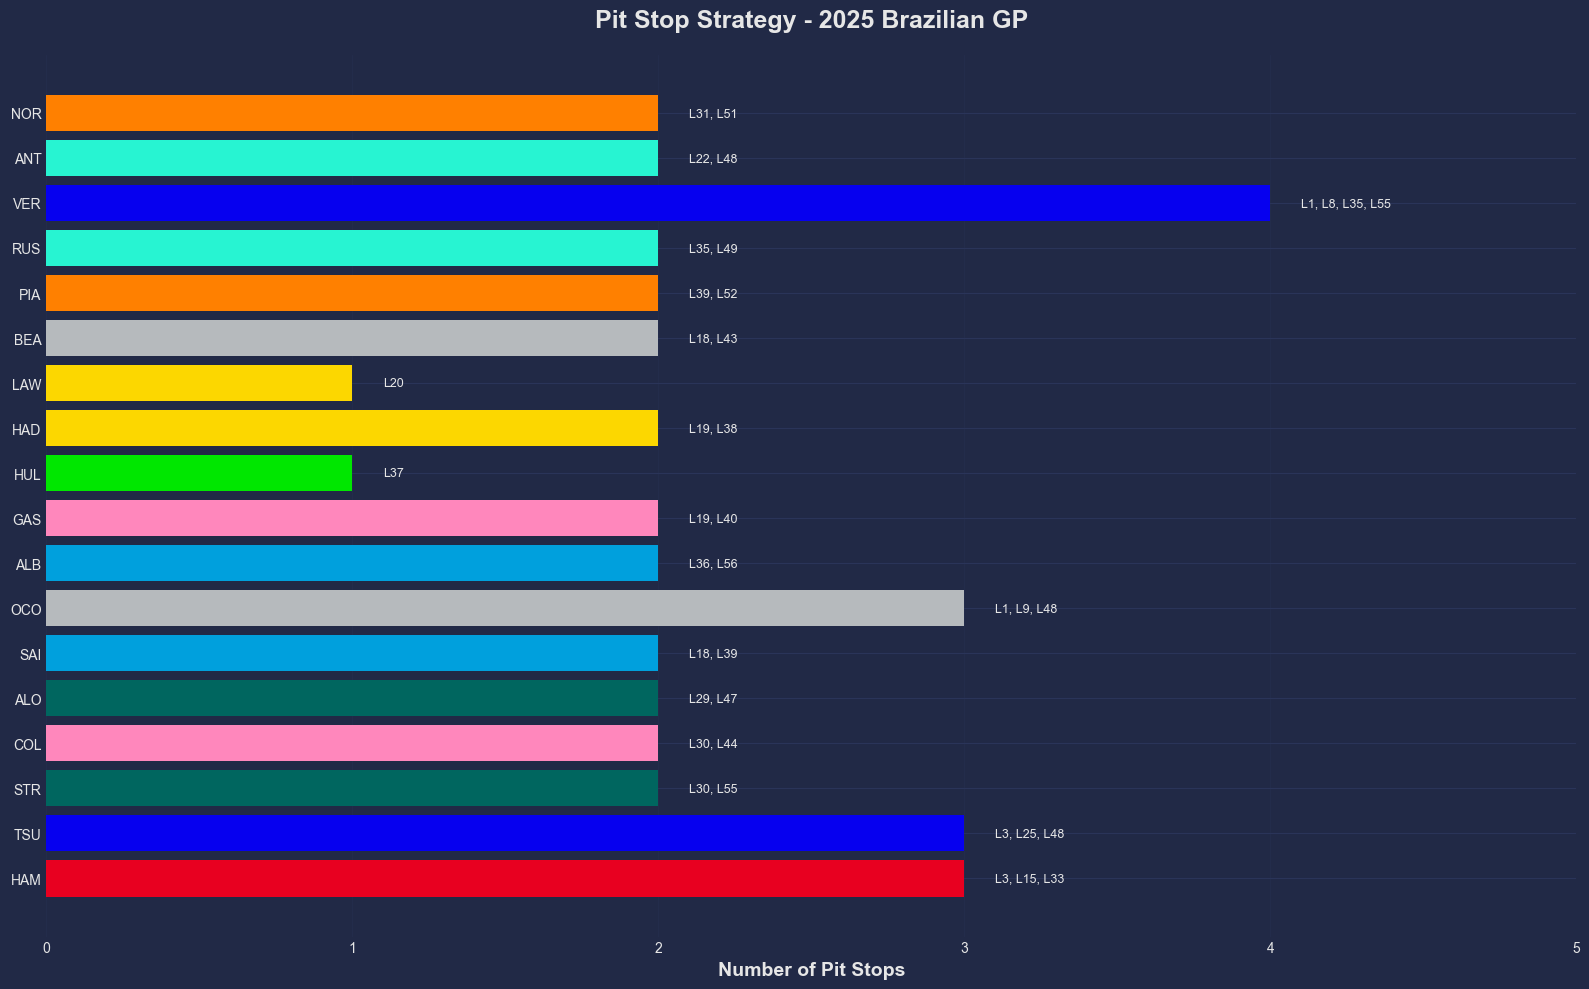

In [59]:
# Pit stop analysis
print("\n⚙️ PIT STOP ANALYSIS\n")

# Collect pit stop data for all drivers
pit_stops_data = []
for driver_id in race.drivers:
    driver_laps = race.laps.pick_driver(driver_id)

    # Filter laps where the driver entered the pit lane using PitOutTime
    pit_laps = driver_laps[driver_laps['PitOutTime'].notna()]

    num_stops = len(pit_laps)

    if num_stops > 0:
        pit_laps_numbers = pit_laps['LapNumber'].tolist()

        # Get driver abbreviation for consistent lookup
        driver_abbr = race.get_driver(driver_id).Abbreviation

        pit_stops_data.append({
            'Driver': driver_abbr, # Use abbreviation for consistency
            'Team': driver_laps.iloc[0]['Team'],
            'NumStops': num_stops,
            'PitLaps': pit_laps_numbers
        })

pit_stops_df = pd.DataFrame(pit_stops_data)

# Check if pit_stops_df is empty BEFORE merging and plotting
if pit_stops_df.empty:
    print("❌ No pit stop data available or recorded for this race session.")
    print("The pit stop visualization will not be generated.")
else:
    # Merge with results_df to get final position and sort
    pit_stops_df = pit_stops_df.merge(results_df[['Driver', 'Position']], on='Driver', how='left')
    pit_stops_df = pit_stops_df.sort_values('Position').reset_index(drop=True)

    print(pit_stops_df[['Position', 'Driver', 'Team', 'NumStops', 'PitLaps']].to_string(index=False))

    # Visualize pit stop strategy
    fig, ax = plt.subplots(figsize=(16, 10))

    # Ensure colors are generated based on the 'Driver' column of the pit_stops_df
    colors = [fastf1.plotting.get_driver_color(driver_abbr, session=race) for driver_abbr in pit_stops_df['Driver']]
    bars = ax.barh(pit_stops_df['Driver'], pit_stops_df['NumStops'],
                   color=colors, linewidth=1.5)

    ax.set_xlabel('Number of Pit Stops', fontsize=14, fontweight='bold')
    ax.set_title('Pit Stop Strategy - 2025 Brazilian GP',
                 fontsize=18, fontweight='bold', pad=20)
    ax.grid(True, alpha=0.3, axis='x')
    ax.invert_yaxis()

    max_stops = int(pit_stops_df['NumStops'].max())
    ax.set_xticks(range(0, max_stops + 2))

    # Add labels
    for bar, pit_laps in zip(bars, pit_stops_df['PitLaps']):
        width = bar.get_width()
        lap_str = ', '.join([f"L{int(lap)}" for lap in pit_laps]) # Cast lap to int for clean display
        ax.text(width + 0.1, bar.get_y() + bar.get_height()/2.,
                 f'{lap_str}',
                 ha='left', va='center', fontsize=9)

    plt.tight_layout()
    plt.savefig('brazil_2025_pit_stops.png', dpi=300, bbox_inches='tight', facecolor='#0e1117')
    plt.show()

print("\n" + "="*80)

In [60]:
# Compare fastest laps of P1 and P2
print("📡 TELEMETRY COMPARISON: P1 vs P2\n")

driver1 = results_df.iloc[0]['Driver']
driver2 = results_df.iloc[1]['Driver']

print(f"Comparing {driver1} vs {driver2}...\n")

# Get fastest laps
lap1 = race.laps.pick_driver(driver1).pick_fastest()
lap2 = race.laps.pick_driver(driver2).pick_fastest()

# Get telemetry
tel1 = lap1.get_telemetry()
tel2 = lap2.get_telemetry()

# Get driver colors
color1 = fastf1.plotting.get_driver_color(driver1, session=race)
color2 = fastf1.plotting.get_driver_color(driver2, session=race)

print(f"✅ Telemetry loaded for both drivers")
print(f"   {driver1} fastest lap: {lap1['LapTime']}")
print(f"   {driver2} fastest lap: {lap2['LapTime']}")
print(f"   Delta: {(lap2['LapTime'] - lap1['LapTime']).total_seconds():.3f}s\n")

📡 TELEMETRY COMPARISON: P1 vs P2

Comparing NOR vs ANT...

✅ Telemetry loaded for both drivers
   NOR fastest lap: 0 days 00:01:13.040000
   ANT fastest lap: 0 days 00:01:13.123000
   Delta: 0.083s



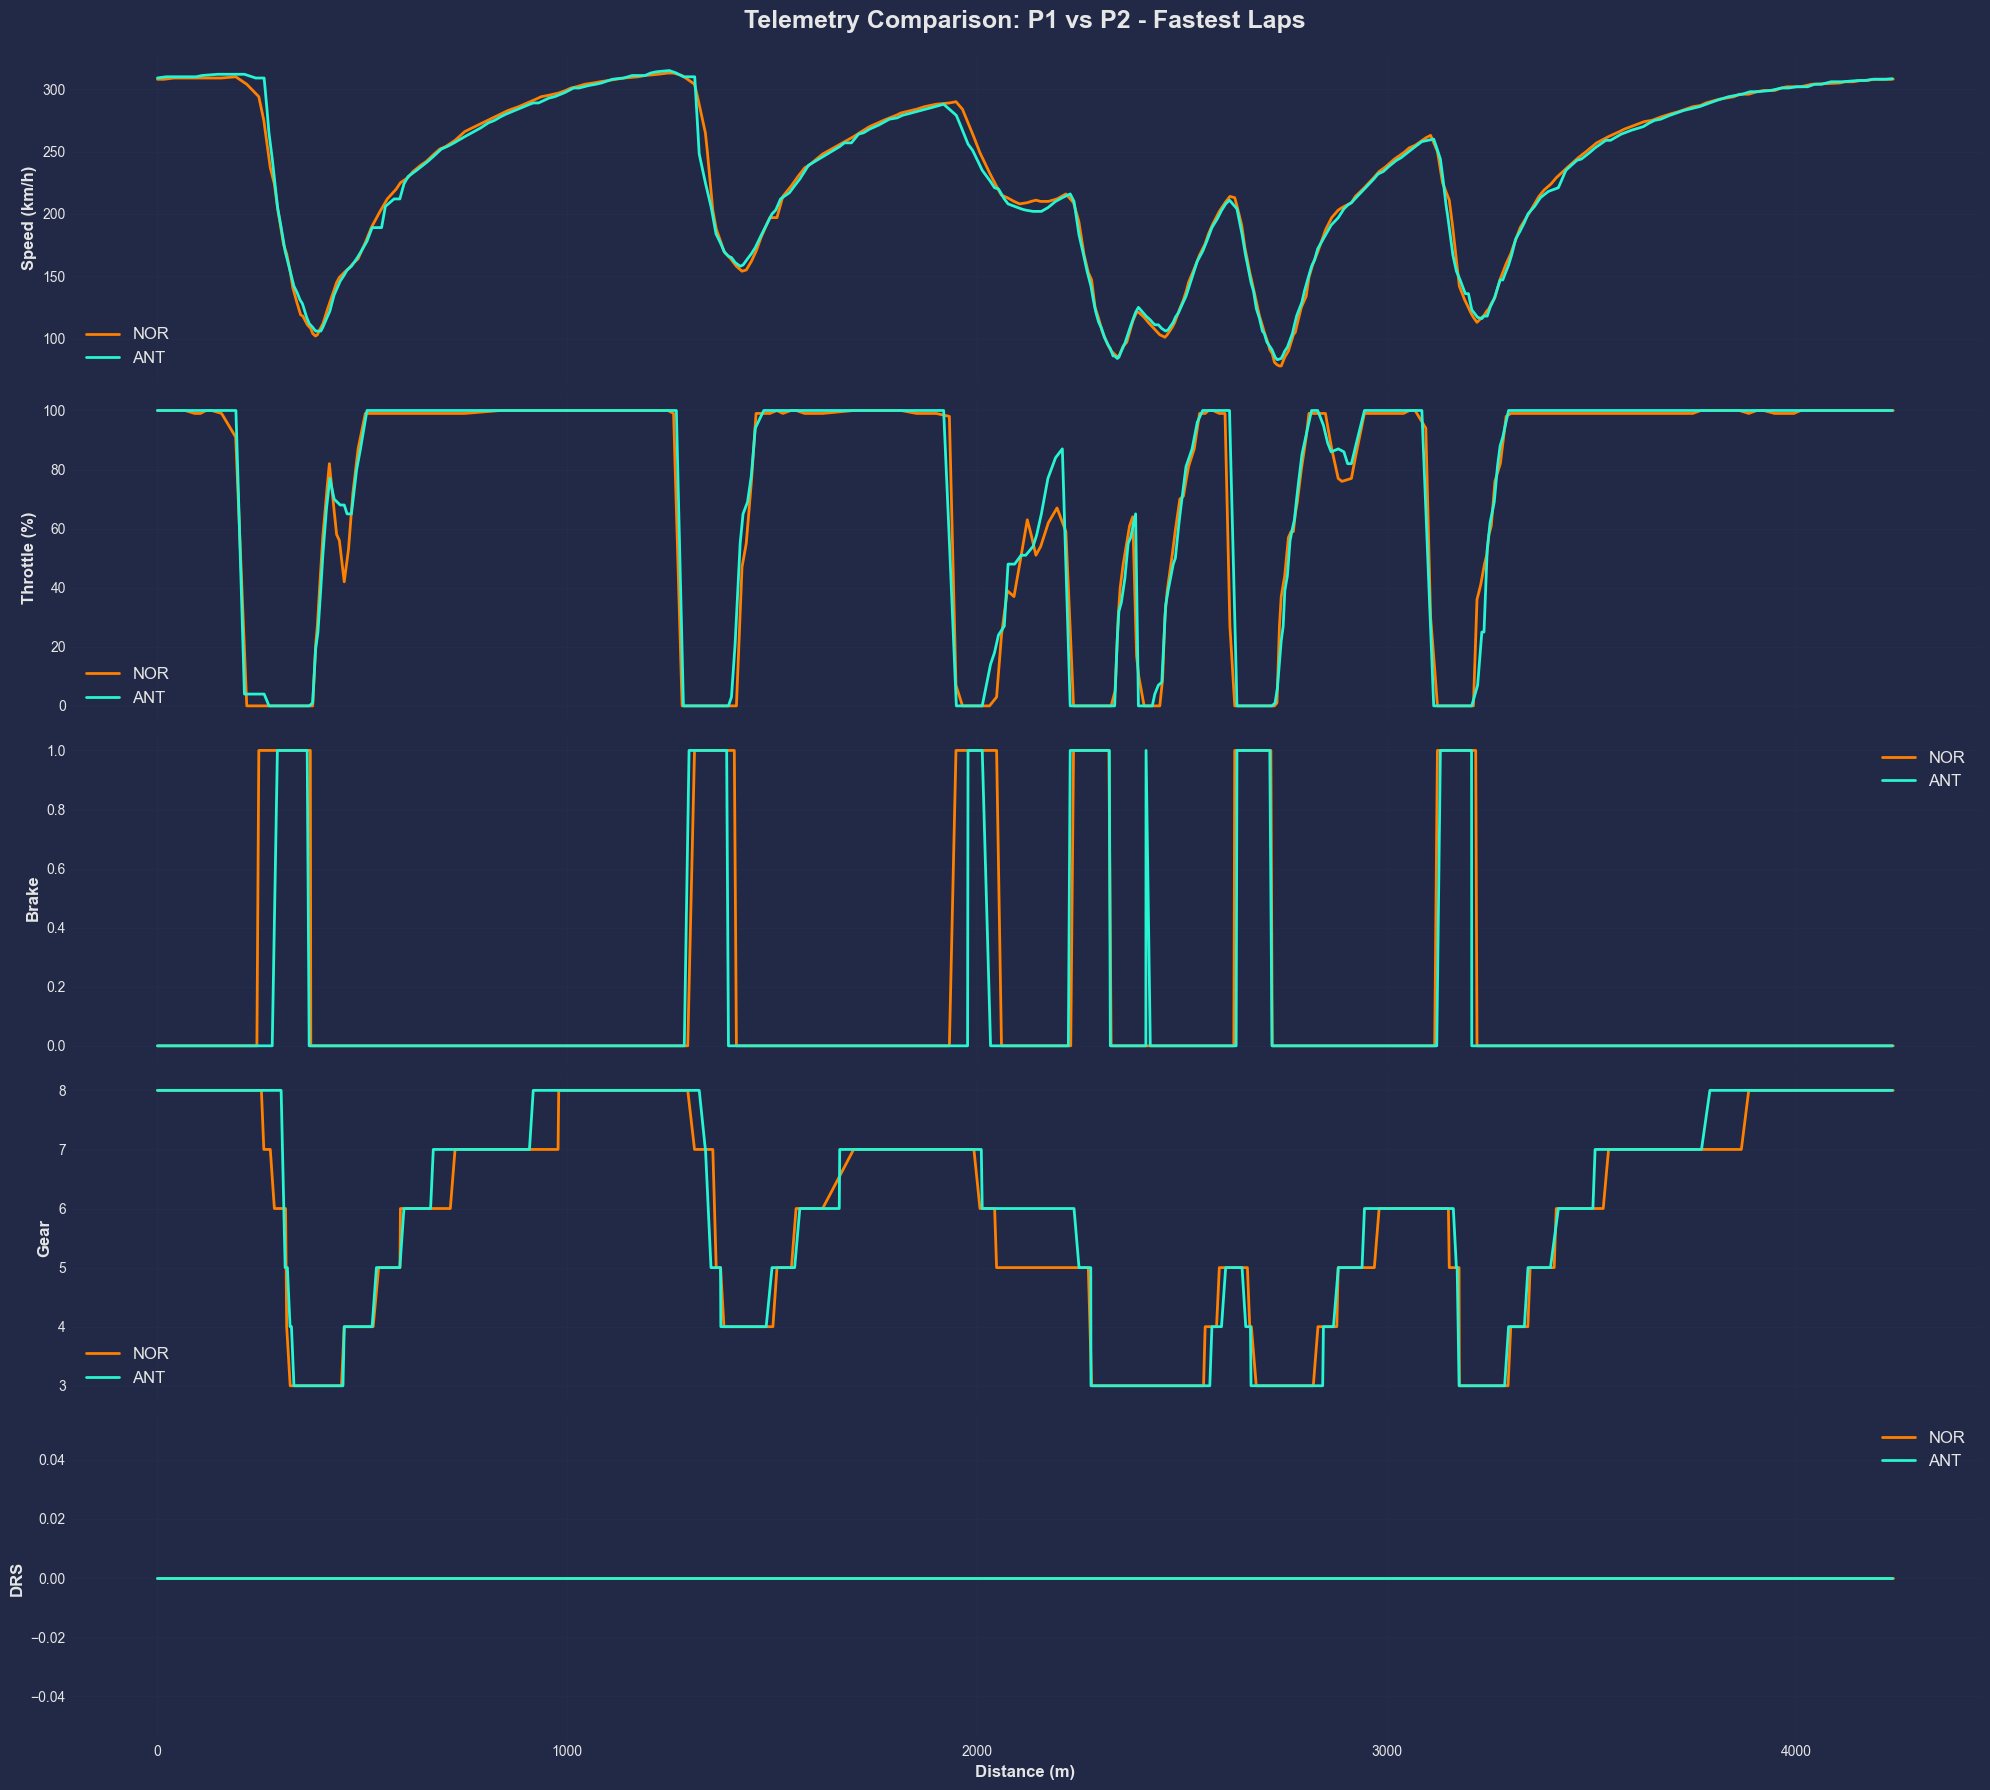

In [65]:
# Create telemetry comparison plot
fig, axes = plt.subplots(5, 1, figsize=(20, 18), sharex=True)

# Speed comparison
axes[0].plot(tel1['Distance'], tel1['Speed'], color=color1, label=driver1, linewidth=2)
axes[0].plot(tel2['Distance'], tel2['Speed'], color=color2, label=driver2, linewidth=2)
axes[0].set_ylabel('Speed (km/h)', fontsize=12, fontweight='bold')
axes[0].set_title('Telemetry Comparison: P1 vs P2 - Fastest Laps',
                  fontsize=18, fontweight='bold', pad=20)
axes[0].legend(fontsize=12)
axes[0].grid(True, alpha=0.3)

# Throttle comparison
axes[1].plot(tel1['Distance'], tel1['Throttle'], color=color1, label=driver1, linewidth=2)
axes[1].plot(tel2['Distance'], tel2['Throttle'], color=color2, label=driver2, linewidth=2)
axes[1].set_ylabel('Throttle (%)', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=12)
axes[1].grid(True, alpha=0.3)

# Brake comparison
axes[2].plot(tel1['Distance'], tel1['Brake'], color=color1, label=driver1, linewidth=2)
axes[2].plot(tel2['Distance'], tel2['Brake'], color=color2, label=driver2, linewidth=2)
axes[2].set_ylabel('Brake', fontsize=12, fontweight='bold')
axes[2].legend(fontsize=12)
axes[2].grid(True, alpha=0.3)

# Gear comparison
axes[3].plot(tel1['Distance'], tel1['nGear'], color=color1, label=driver1, linewidth=2)
axes[3].plot(tel2['Distance'], tel2['nGear'], color=color2, label=driver2, linewidth=2)
axes[3].set_ylabel('Gear', fontsize=12, fontweight='bold')
axes[3].legend(fontsize=12)
axes[3].grid(True, alpha=0.3)

# DRS comparison
axes[4].plot(tel1['Distance'], tel1['DRS'], color=color1, label=driver1, linewidth=2)
axes[4].plot(tel2['Distance'], tel2['DRS'], color=color2, label=driver2, linewidth=2)
axes[4].set_ylabel('DRS', fontsize=12, fontweight='bold')
axes[4].set_xlabel('Distance (m)', fontsize=12, fontweight='bold')
axes[4].legend(fontsize=12)
axes[4].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('brazil_2025_telemetry.png', dpi=300, bbox_inches='tight', facecolor='#0e1117')
plt.show()


🗺️ Creating speed trace visualization...



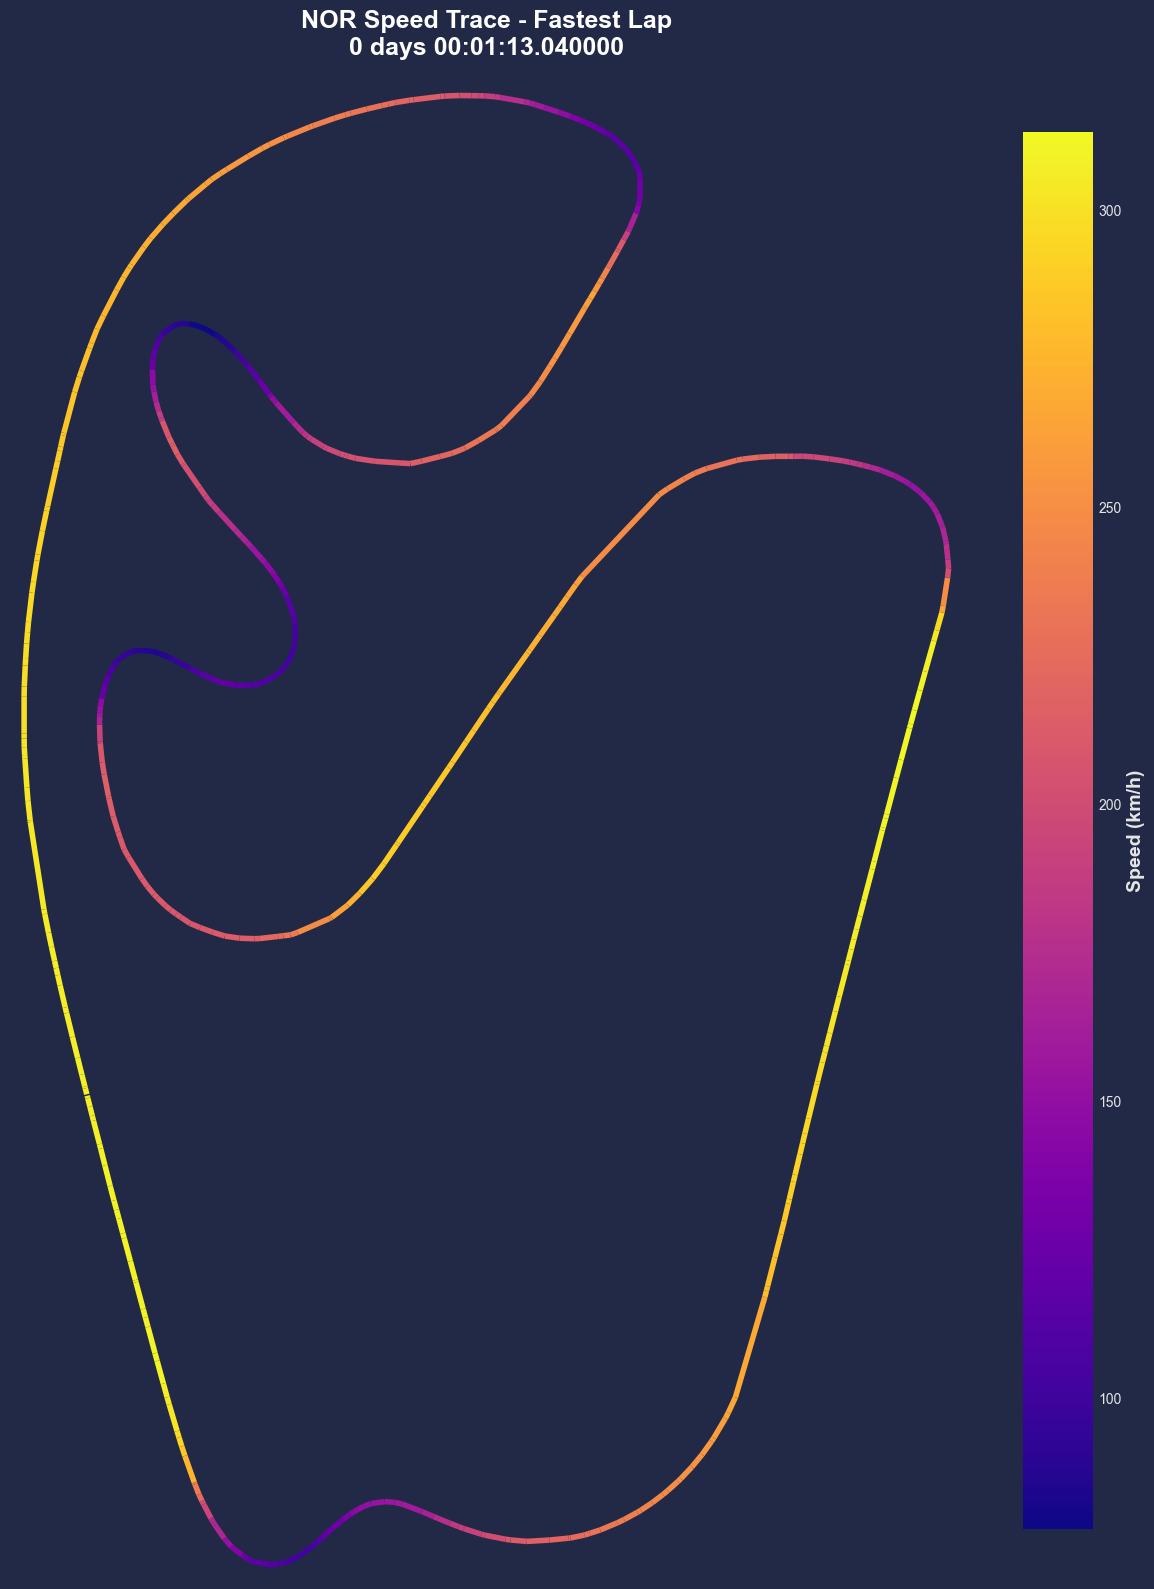

In [66]:
# Speed trace on track map
print("\n🗺️ Creating speed trace visualization...\n")

# Get position data
x1 = tel1['X']
y1 = tel1['Y']
speed1 = tel1['Speed']

# Create segments for color mapping
points = np.array([x1, y1]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create figure
fig, ax = plt.subplots(figsize=(16, 16))

# Normalize speed for colormap
norm = plt.Normalize(speed1.min(), speed1.max())
lc = LineCollection(segments, cmap='plasma', norm=norm, linewidth=4)
lc.set_array(speed1)

ax.add_collection(lc)
ax.set_aspect('equal')
ax.axis('off')

# Add colorbar
cbar = plt.colorbar(lc, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Speed (km/h)', fontsize=14, fontweight='bold')

ax.set_title(f'{driver1} Speed Trace - Fastest Lap\n{lap1["LapTime"]}',
             fontsize=18, fontweight='bold', pad=20, color='white')

# Set limits
ax.set_xlim(x1.min() - 100, x1.max() + 100)
ax.set_ylim(y1.min() - 100, y1.max() + 100)

plt.tight_layout()
plt.savefig('brazil_2025_speed_trace.png', dpi=300, bbox_inches='tight', facecolor='#0e1117')
plt.show()

In [63]:
# Comprehensive race statistics
print("="*80)
print("📊 2025 BRAZILIAN GRAND PRIX - COMPREHENSIVE STATISTICS")
print("="*80)

print("\n🏆 RACE WINNER")
winner = results_df.iloc[0]
print(f"   Driver: {winner['Driver']}")
print(f"   Team: {winner['Team']}")
print(f"   Grid Position: {int(winner['GridPosition'])}")
print(f"   Positions Gained: {int(winner['Positions_Gained'])}")
print(f"   Points Scored: {int(winner['Points'])}")

print("\n⚡ FASTEST LAP")
fastest = fastest_df.iloc[0]
print(f"   Driver: {fastest['Driver']}")
print(f"   Time: {fastest['LapTime']:.3f}s")
print(f"   Lap: {int(fastest['LapNumber'])}")
print(f"   Compound: {fastest['Compound']}")

print("\n📈 BIGGEST POSITION GAINS")
top_gainers = results_df.nlargest(3, 'Positions_Gained')
for idx, row in top_gainers.iterrows():
    print(f"   {row['Driver']}: +{int(row['Positions_Gained'])} positions (P{int(row['GridPosition'])} → P{int(row['Position'])})")

print("\n🔧 PIT STOP STRATEGIES")
strategy_summary = pit_stops_df.groupby('NumStops').size()
for stops, count in strategy_summary.items():
    print(f"   {int(stops)}-stop strategy: {count} drivers")

print("\n🛞 TIRE COMPOUND USAGE")
compound_usage = race.laps['Compound'].value_counts()
for compound, count in compound_usage.items():
    if pd.notna(compound):
        print(f"   {compound}: {count} laps")

print("\n🏁 RACE COMPLETION")
finishers = results_df[results_df['Status'] == 'Finished'].shape[0]
dnf = results_df[results_df['Status'] != 'Finished'].shape[0]
print(f"   Finishers: {finishers}")
print(f"   DNF/DSQ: {dnf}")
print(f"   Completion Rate: {(finishers/len(results_df)*100):.1f}%")

print("\n" + "="*80)

📊 2025 BRAZILIAN GRAND PRIX - COMPREHENSIVE STATISTICS

🏆 RACE WINNER
   Driver: NOR
   Team: McLaren
   Grid Position: 1
   Positions Gained: 0
   Points Scored: 25

⚡ FASTEST LAP
   Driver: 23
   Time: 72.400s
   Lap: 59
   Compound: MEDIUM

📈 BIGGEST POSITION GAINS
   VER: +16 positions (P19 → P3)
   OCO: +8 positions (P20 → P12)
   RUS: +2 positions (P6 → P4)

🔧 PIT STOP STRATEGIES
   1-stop strategy: 2 drivers
   2-stop strategy: 12 drivers
   3-stop strategy: 3 drivers
   4-stop strategy: 1 drivers

🛞 TIRE COMPOUND USAGE
   MEDIUM: 919 laps
   SOFT: 246 laps
   HARD: 86 laps

🏁 RACE COMPLETION
   Finishers: 17
   DNF/DSQ: 3
   Completion Rate: 85.0%




🏎️ TEAM PERFORMANCE ANALYSIS

                 Total_Points  Best_Finish  Avg_Position  Avg_Positions_Gained
Team                                                                          
McLaren                  35.0            1             3                     0
Mercedes                 30.0            2             3                     1
Red Bull Racing          15.0            3            10                     8
Racing Bulls             10.0            7             7                    -1
Haas F1 Team              8.0            6             9                     5
Kick Sauber               2.0            9            14                     0
Alpine                    1.0           10            12                     0
Aston Martin              0.0           14            15                    -2
Ferrari                   0.0           18            18                   -10
Williams                  0.0           11            12                     1


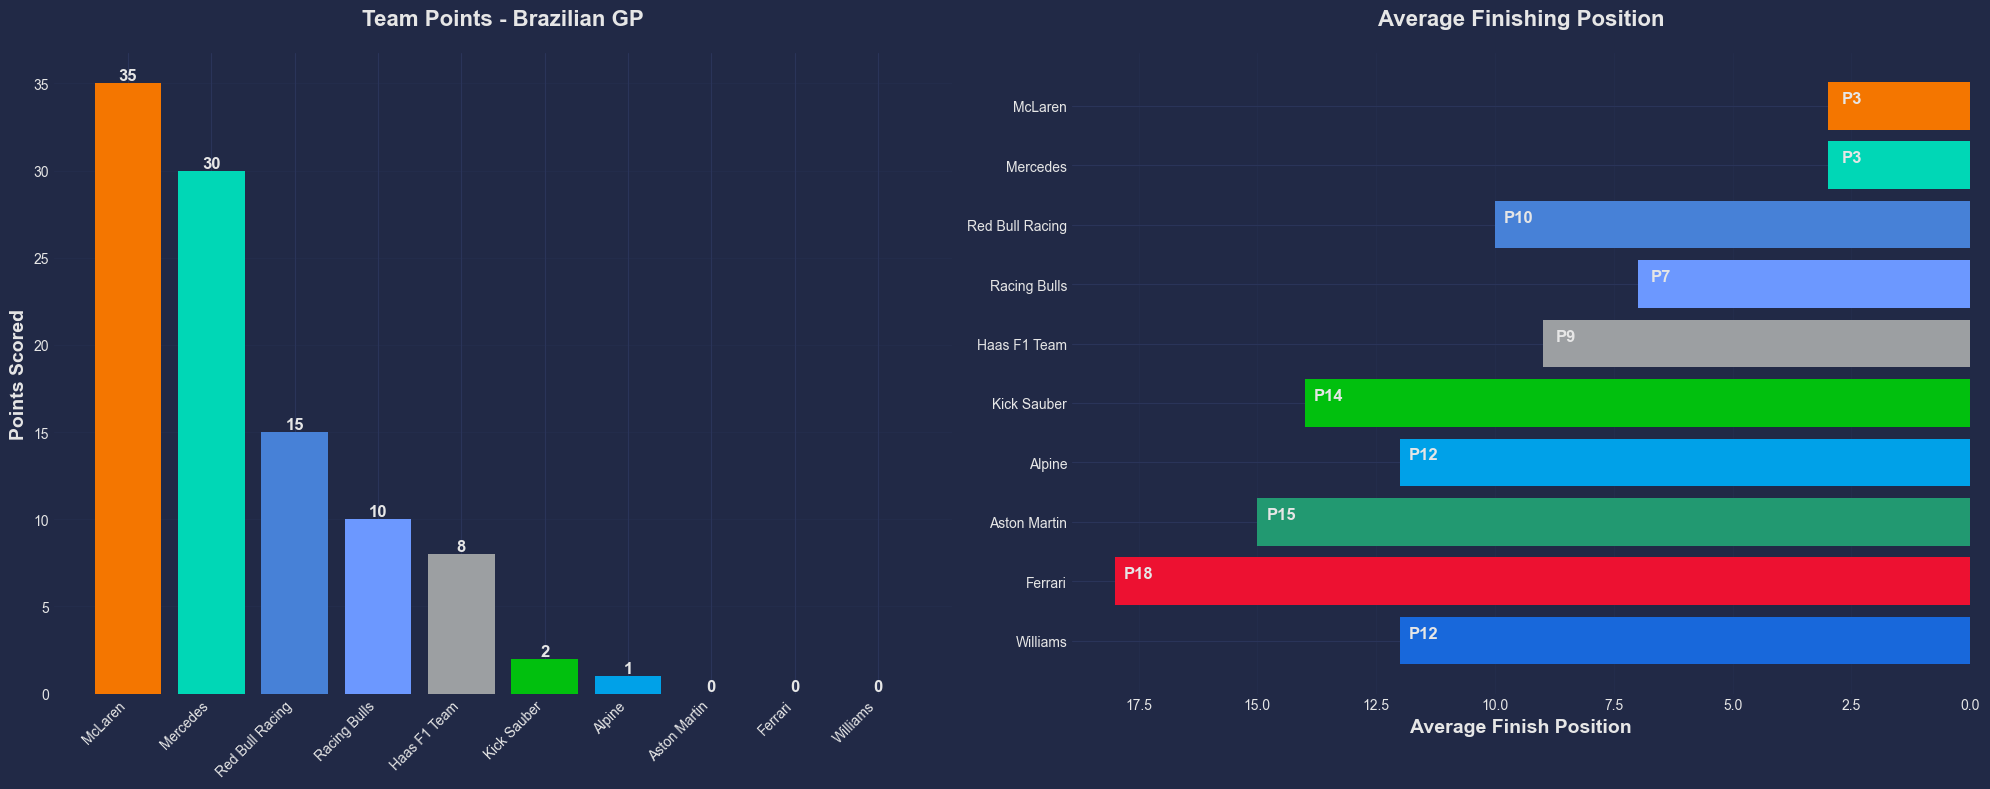

In [69]:
# Team performance comparison
print("\n🏎️ TEAM PERFORMANCE ANALYSIS\n")

team_stats = results_df.groupby('Team').agg({
    'Points': 'sum',
    'Position': ['min', 'mean'],
    'Positions_Gained': 'mean'
}).round(2)

team_stats.columns = ['Total_Points', 'Best_Finish', 'Avg_Position', 'Avg_Positions_Gained']
team_stats = team_stats.sort_values('Total_Points', ascending=False)
team_stats[['Avg_Position', 'Avg_Positions_Gained']] = team_stats[['Avg_Position', 'Avg_Positions_Gained']].astype(int)

print(team_stats)

# Visualize team performance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Team points
colors_teams = {
    team: plotting.get_team_color(team, race, colormap='official')
    for team in team_stats.index
}
bars1 = ax1.bar(range(len(team_stats)), team_stats['Total_Points'],
                color=[colors_teams[team] for team in team_stats.index], linewidth=2)
ax1.set_xticks(range(len(team_stats)))
ax1.set_xticklabels(team_stats.index, rotation=45, ha='right')
ax1.set_ylabel('Points Scored', fontsize=14, fontweight='bold')
ax1.set_title('Team Points - Brazilian GP', fontsize=16, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3, axis='y')

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Average finish position
bars2 = ax2.barh(team_stats.index, team_stats['Avg_Position'],
                 color=[colors_teams[team] for team in team_stats.index], linewidth=2)
ax2.set_xlabel('Average Finish Position', fontsize=14, fontweight='bold')
ax2.set_title('Average Finishing Position', fontsize=16, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3, axis='x')
ax2.invert_xaxis()
ax2.invert_yaxis()

for i, (bar, val) in enumerate(zip(bars2, team_stats['Avg_Position'])):
    ax2.text(val - 0.5, bar.get_y() + bar.get_height()/2.,
             f'P{val:.0f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('brazil_2025_team_performance.png', dpi=300, bbox_inches='tight', facecolor='#0e1117')
plt.show()